In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Suicidesindia2001-2012.csv')

In [3]:
D = data.groupby('Year').Total.sum()
D

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

In [4]:
x = D.index.values
y = D.values

In [5]:
x = D.index.values.reshape(-1,1)
x

array([[2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [6]:
y

array([ 976464,  993648,  997622, 1023137, 1025201, 1062991, 1103667,
       1125082, 1144033, 1211322, 1219499, 1189068], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=6)
x_poly=poly_reg.fit_transform(X_train)
x_poly_test=poly_reg.fit_transform(X_test)


In [9]:
pd.DataFrame(x_poly)

,0,1,2,3,4,5,6
0,1.0,2011.0,4044121.0,8.132727e+09,1.635491e+13,3.288973e+16,6.614125e+19
1,1.0,2003.0,4012009.0,8.036054e+09,1.609622e+13,3.224072e+16,6.457816e+19
2,1.0,2009.0,4036081.0,8.108487e+09,1.628995e+13,3.272651e+16,6.574756e+19
3,1.0,2002.0,4008004.0,8.024024e+09,1.606410e+13,3.216032e+16,6.438496e+19
4,1.0,2008.0,4032064.0,8.096385e+09,1.625754e+13,3.264514e+16,6.555144e+19
5,1.0,2010.0,4040100.0,8.120601e+09,1.632241e+13,3.280804e+16,6.594416e+19
6,1.0,2004.0,4016016.0,8.048096e+09,1.612838e+13,3.232128e+16,6.477185e+19
7,1.0,2001.0,4004001.0,8.012006e+09,1.603202e+13,3.208008e+16,6.419224e+19
8,1.0,2006.0,4024036.0,8.072216e+09,1.619287e+13,3.248289e+16,6.516067e+19


In [10]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_poly,y_train)

LinearRegression()

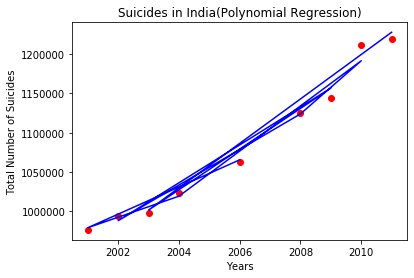

In [11]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,reg.predict(x_poly),color='blue')
plt.title('Suicides in India(Polynomial Regression)')
plt.xlabel('Years')
plt.ylabel("Total Number of Suicides")
plt.show()

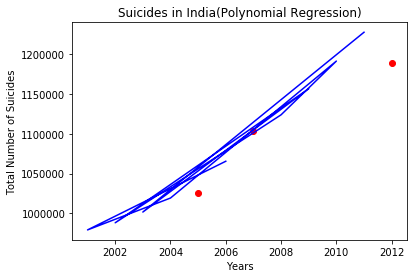

In [12]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,reg.predict(x_poly),color='blue')
plt.title('Suicides in India(Polynomial Regression)')
plt.xlabel('Years')
plt.ylabel("Total Number of Suicides")
plt.show()

In [13]:
Yp=reg.predict(x_poly_test)
Yp

array([1093400.74974442, 1265064.3703804 , 1040739.41734695])

In [17]:
np.set_printoptions(precision=2)
print(np.concatenate((Yp.reshape(len(Yp),1), y_test.reshape(len(y_test),1)),1))

[[1093400.75 1103667.  ]
 [1265064.37 1189068.  ]
 [1040739.42 1025201.  ]]


In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,Yp)

0.544276480904626

In [16]:
print(reg.predict(poly_reg.fit_transform([[2020]])))

[1559553.56050491]
